### This notebook is used to plot and save the magnetisation $\textbf{m}$

In [1]:
from time import time
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc

from continuous_model.simulator import *
from continuous_model.plot_model import plot_field

### 1. Read files 
This code is used to read the name of magnetisation file different steps from a folder

In [2]:
# list the ".npy" files
def GetFileList(dir, fileList): 
    if os.path.isfile(dir): 
        print("input must be a dir!")
    elif os.path.isdir(dir):
        for s in os.listdir(dir):
            fileList.append(s)
    fileList = [t for t in fileList if '.npy' in t]
    fileList.remove("final.npy")
    list_final = [str(i+1) + ".npy" for i in range(len(fileList))]
    list_final.append("final.npy")
    return list_final

npy_list = GetFileList('./postprocessing/iterations/', [])
print(npy_list)

['1.npy', '2.npy', '3.npy', '4.npy', '5.npy', '6.npy', '7.npy', '8.npy', '9.npy', '10.npy', '11.npy', '12.npy', '13.npy', '14.npy', '15.npy', '16.npy', '17.npy', '18.npy', '19.npy', '20.npy', 'final.npy']


### 1. Save in VTK Format
After you get a list of names, you can save the magnetisation vector fields in VTK format. Please ensure you close save_plot.ipynb before running visualization.ipynb.

/opt/anaconda3/envs/ese-msc/lib/python3.9/site-packages/discretisedfield/plotting/mpl.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


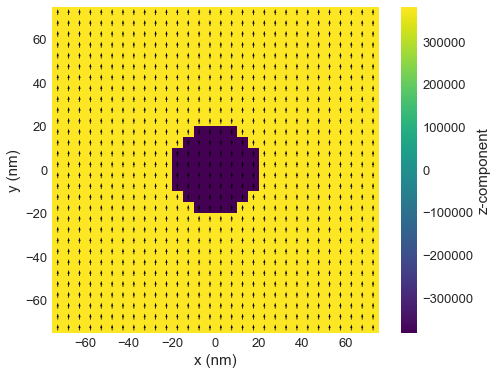

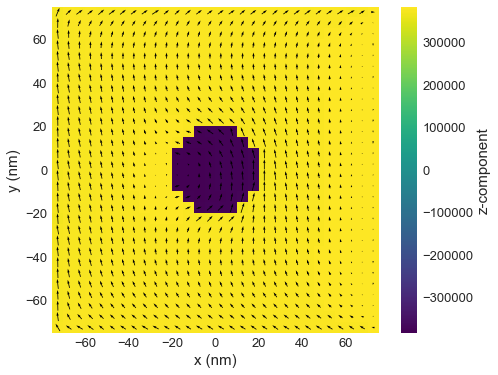

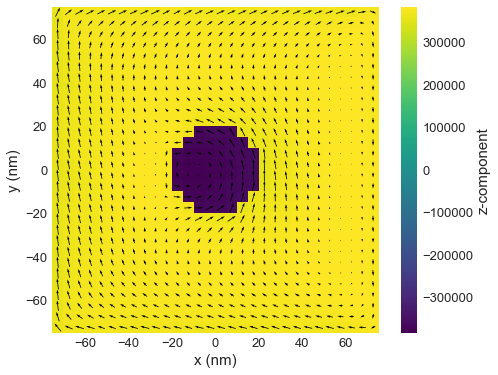

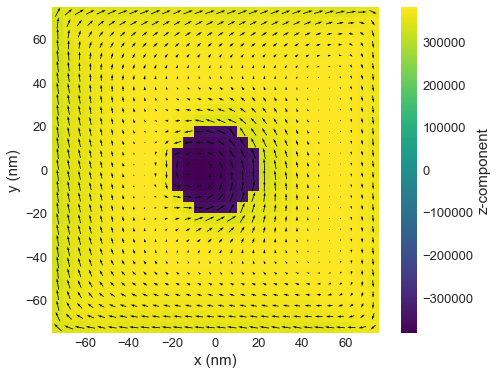

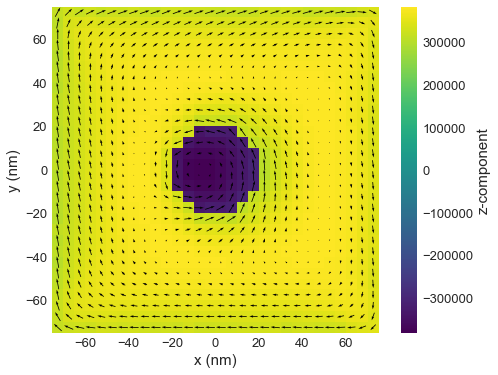

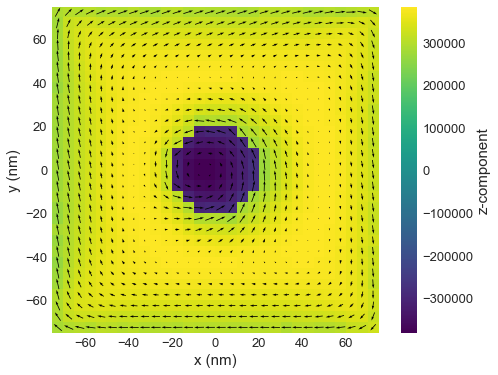

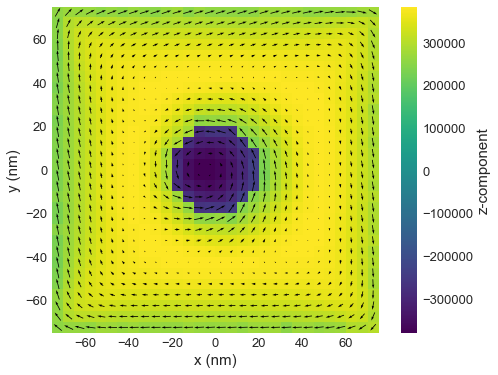

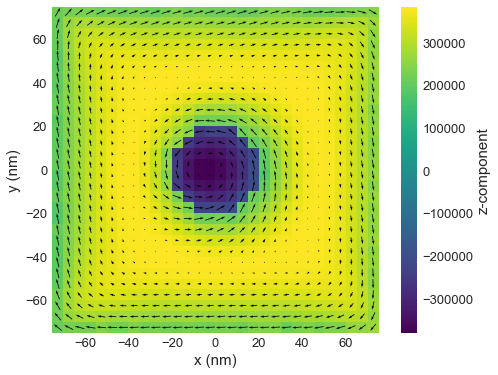

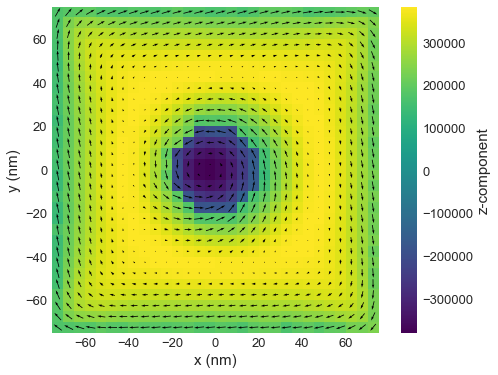

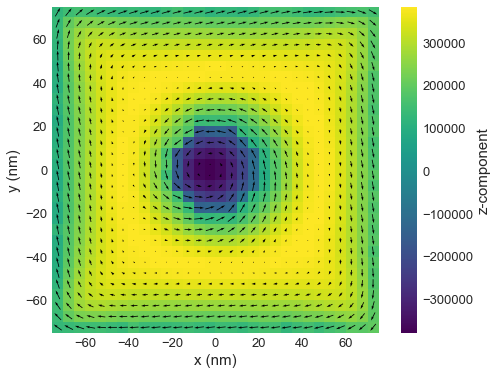

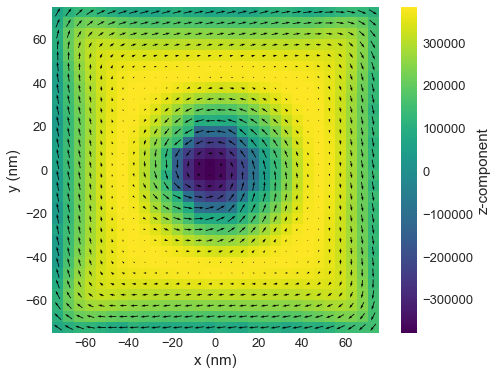

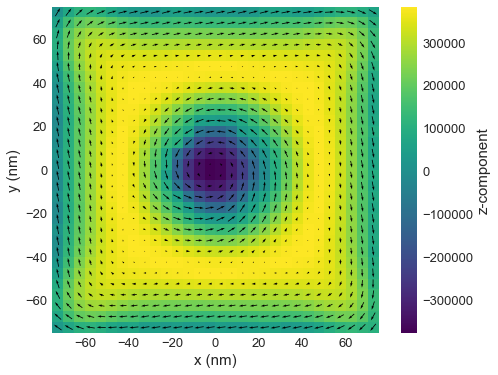

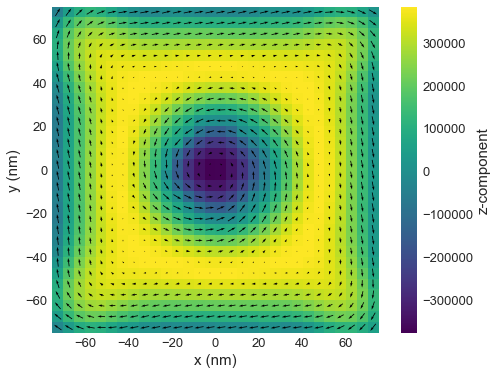

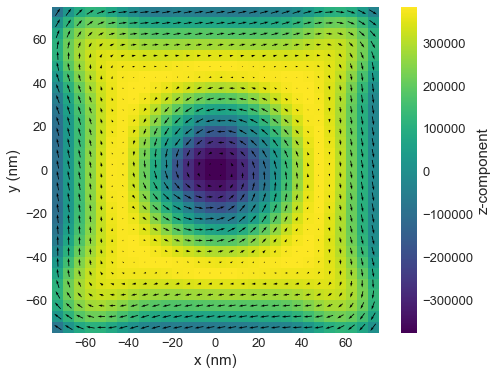

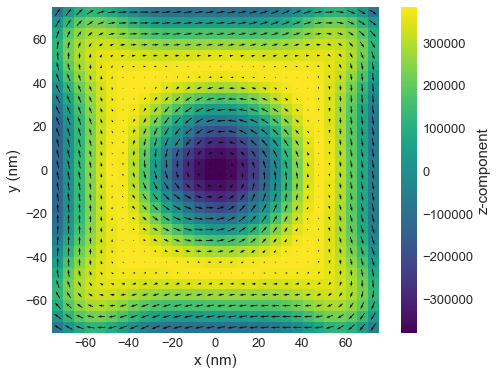

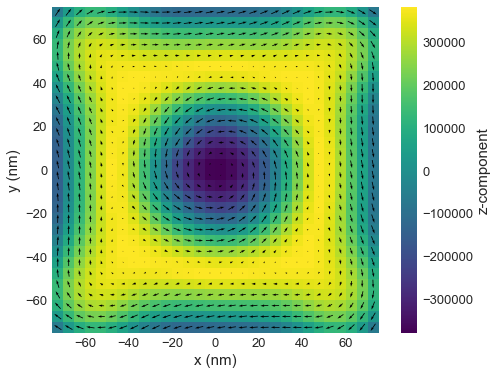

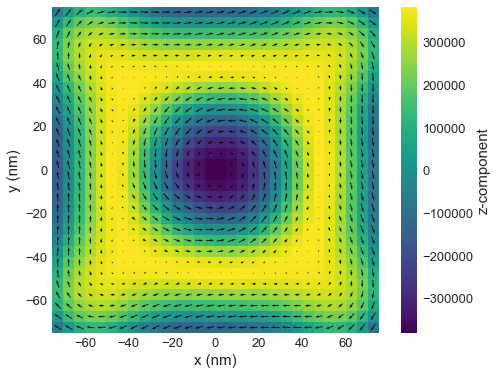

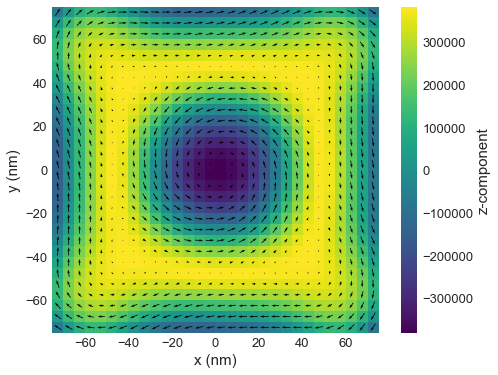

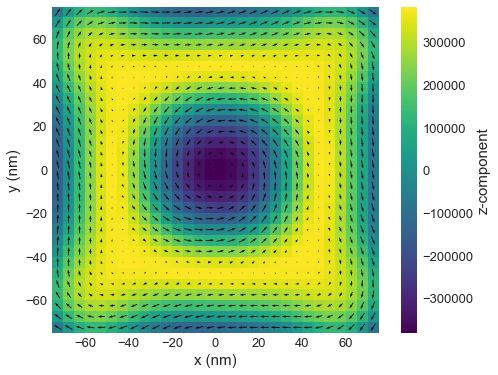

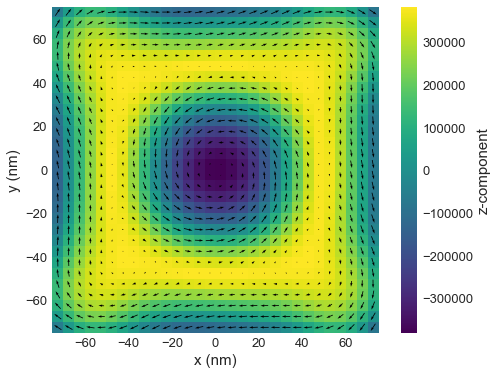

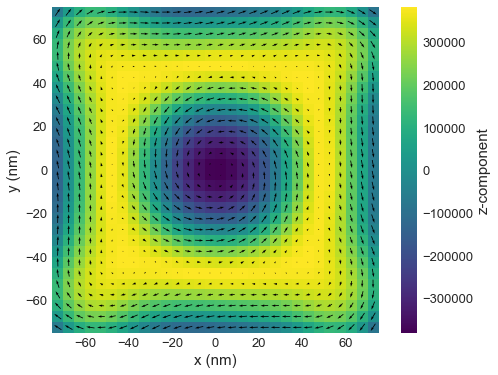

In [3]:
# Define several parameters
Ms = 3.84e5

for file in npy_list:
    arr = np.load('./postprocessing/iterations/' + file)
    nx = arr.shape[0]
    ny = arr.shape[1]
    nz = arr.shape[2]


    my_cool_mesh = RectangularMesh(nx=nx, ny=ny, nz=nz, units=5e-9)
    my_cool_m = m_Field(my_cool_mesh, Ms, arr)
    
    save_name = file.split(".")[0]
    field = plot_field(my_cool_mesh, my_cool_m, 'z', value=10e-9, save_path='./postprocessing/plots/', save_name=save_name)